# Linear Regression Assignment

In this assignment will do end to end linear regression project to predict car prices.Data and Data Dictionary is given along with the Jupyter notebook

# Steps Involved

"""    Data Importing and Understanding
        Data Inspection
    
    Data Cleaning
        Delete useless columns
        Delete all Unique columns
        Impute missing values
        
    Data Visualization
        Plot distribution graphs for numerical data
        plot categorical data
        
    Data analysis
        Univariate Analysis
        Bivariate Analysis
        Create heatmaps and pairplots
        
    Understanding Business insights
        find some business related insights
        
    Data preprocessing
        Labelencoding,One hot encoding if needed
        Standardization, normalization if needed
                
    Creating Model and training model
        implement from scratch 
        Use sklearn library
        
    Validate your model with right metrics
        R2 score is used for final grading"""

# Target Variable is car price in the data

Rubrics:
Each smection will fetch 10 marks
10 Marks is for commenting code properly
more than 0.80 R2score will fetch good marks (Test set)
Submit assignment in time

# import libraries

Data Importing and Understanding

Data Cleaning

Data Visualization

Data analysis

Understanding Business insights

Data preprocessing

Feature Engineering

Creating Model and training model

Validating model with right metrics

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cars_data = pd.read_csv(r'F:\car_price.csv')
cars_data #Read Cars_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cars_data.head() #Lets see top 5 in cars_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.describe() #Lets Describe

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_data.info() #Cars_data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 # Data Cleaning and Preparation

In [6]:
#Splitting company name from CarName column
CompanyName = cars_data['CarName'].apply(lambda x : x.split(' ')[0])
cars_data.insert(3,"CompanyName",CompanyName)
cars_data.drop(['CarName'],axis=1,inplace=True)
cars_data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars_data.CompanyName.unique() #Lets see Unique in CompanyName using unique

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#replacing names 
cars_data.CompanyName = cars_data.CompanyName.str.lower()
def replace_name(a,b):
    cars_data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
#Checking for duplicates
cars_data.loc[cars_data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
cars_data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Data Visualization
#Plot distribution graphs for numerical data


In [11]:
#"""plt.figure(figsize=(25,10))
#plt.subplot(1,1,1)"""

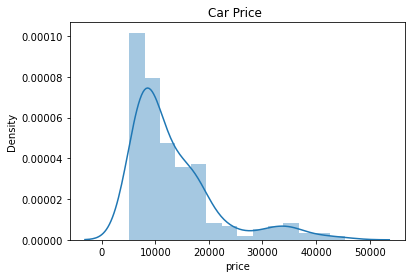

In [12]:
#Distribution plot - car price
plt.title('Car Price ')
sns.distplot(cars_data.price)
plt.show()

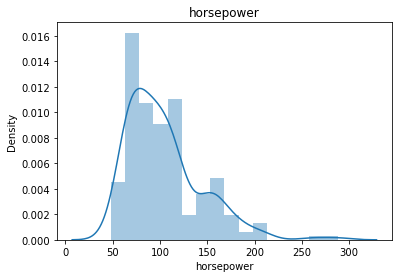

In [13]:
#Distribution plot - Horse Power
plt.title('horsepower')
sns.distplot(cars_data.horsepower)
plt.show()

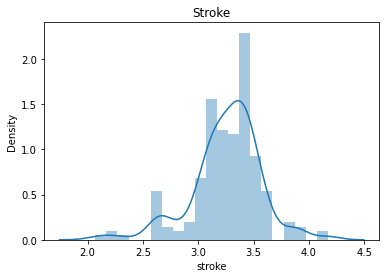

In [14]:
#Distribution plot - Stroke
plt.title('Stroke')
sns.distplot(cars_data.stroke)
plt.show()

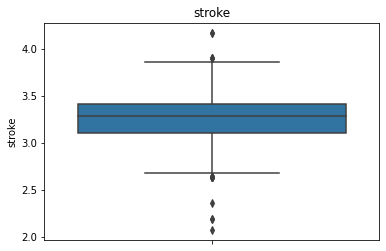

In [15]:
#BOX plot - Stroke
plt.title('stroke')
sns.boxplot(y=cars_data.stroke)
plt.show()

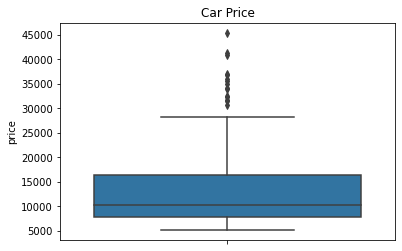

In [16]:
#Box plot - Car price
plt.title('Car Price')
sns.boxplot(y=cars_data.price)
plt.show()

In [17]:
#lets describe cars_data
cars_data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# plot categorical data

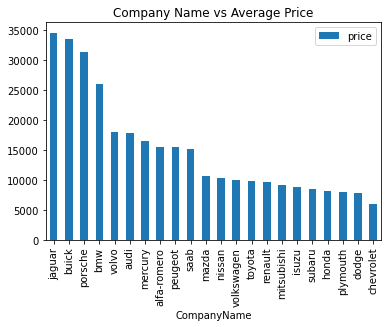

In [18]:
x = pd.DataFrame(cars_data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
x.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

    # as we observe bar plot: Jaguar,Buick and porsche are having highest average price.

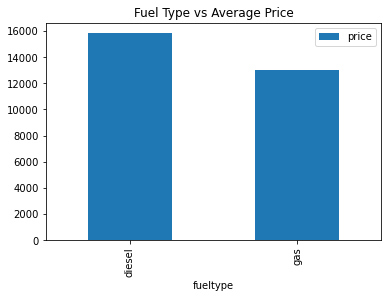

In [19]:
x = pd.DataFrame(cars_data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
x.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

        # we can clearly say diesel has higher average price than gas.

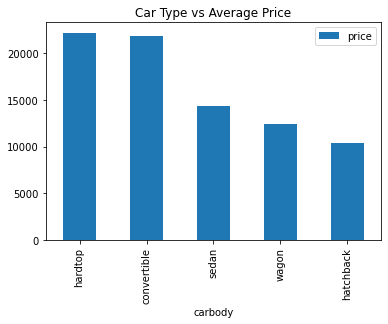

In [20]:
x = pd.DataFrame(cars_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
x.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

         #hardtop and convertible have higher average price.

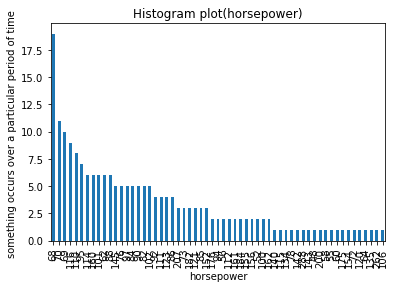

In [21]:
x = cars_data.horsepower.value_counts().plot(kind='bar')
plt.title('Histogram plot(horsepower)')
x.set(xlabel ='horsepower', ylabel='something occurs over a particular period of time ')

plt.show()

       #68 is more favorable to everyone as we observe above histogram plot

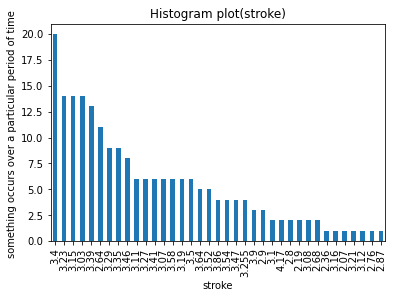

In [22]:
x = cars_data.stroke.value_counts().plot(kind='bar')
plt.title('Histogram plot(stroke)')
x.set(xlabel ='stroke', ylabel='something occurs over a particular period of time ')

plt.show()

                   #3.4 is more favorable stroke 

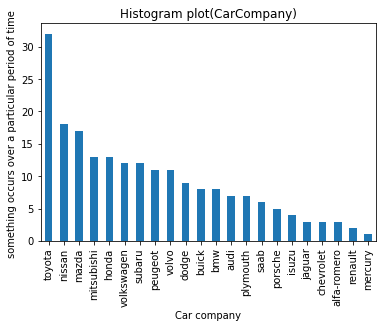

In [23]:
x = cars_data.CompanyName.value_counts().plot(kind='bar')
plt.title('Histogram plot(CarCompany)')
x.set(xlabel ='Car company', ylabel='something occurs over a particular period of time ')

plt.show()

           #toyota is more favorable in car company

[Text(0.5, 0, 'Fuel Type'),
 Text(0, 0.5, 'something occurs over a particular period of time ')]

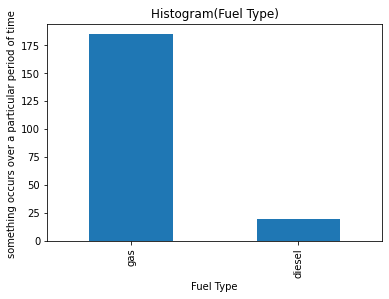

In [24]:
x = cars_data.fueltype.value_counts().plot(kind='bar')
plt.title('Histogram(Fuel Type)')
x.set(xlabel ='Fuel Type', ylabel='something occurs over a particular period of time ')


[Text(0.5, 0, 'Car Type'),
 Text(0, 0.5, 'something occurs over a particular period of time ')]

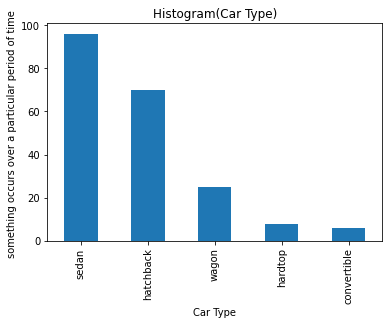

In [25]:
x = cars_data.carbody.value_counts().plot(kind='bar')
plt.title('Histogram(Car Type)')
x.set(xlabel = 'Car Type', ylabel='something occurs over a particular period of time ')

   #as we observe  above car type histogram plot we can conclude that sedan is better when comparewith all types of cars

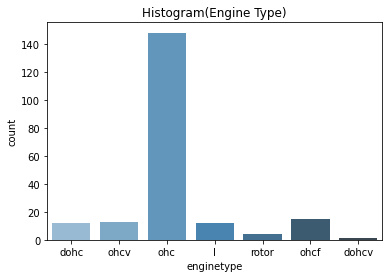

In [26]:
plt.title('Histogram(Engine Type)')
sns.countplot(cars_data.enginetype, palette=("Blues_d"))
plt.show()

          #ohc engine type is more favour to everyone(ohc engine seems like more favourable)

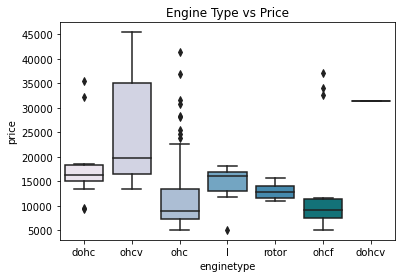

In [27]:
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_data.enginetype, y=cars_data.price, palette=("PuBuGn"))
plt.show()

                #Engine type vs Price

Text(0.5, 1.0, 'Engine Type vs Price')

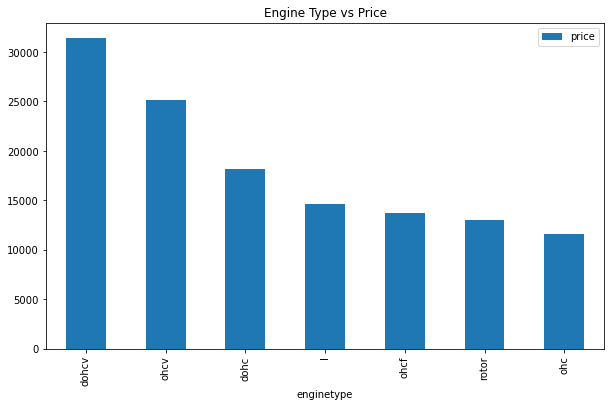

In [28]:
df = pd.DataFrame(cars_data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(10,6))
plt.title('Engine Type vs Price')

                #comparing engine type vs price(Ohcv is having height price range) 

# Visualising numerical data

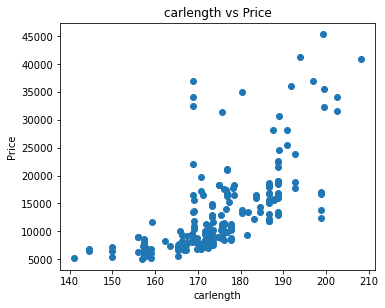

In [29]:
#Plottting Scatter Plot for Car_length
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars_data[x],cars_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)

plt.tight_layout()

     #as we observe car length is having somewhat relation with price

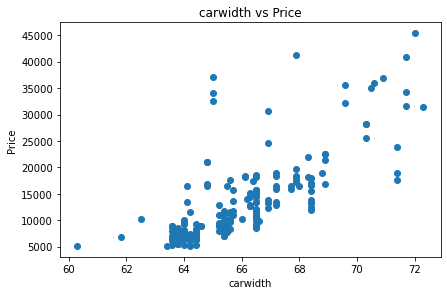

In [30]:
#Plotting Scatter Plot For Car_Width
plt.figure(figsize=(15,25))
scatter('carwidth', 2)

         #as we observe car width is having somewhat relation with price

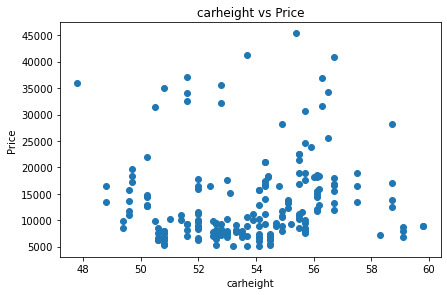

In [31]:
#Plotting Scatter Plot For Car_Height 
plt.figure(figsize=(15,25))
scatter('carheight', 3)

#as we observe car height, it is not having relation with price because of irrelivent in nature

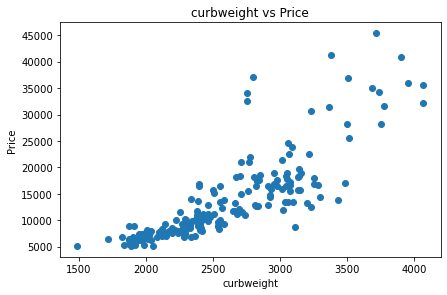

In [32]:
#Plotting scatterplot for curbweight
plt.figure(figsize=(15,25))
scatter('curbweight', 4)

      #as we observe curbweight is having some what relation with price

   #now we can say clearly that car length , car width, curbweight are moreliked when compare with car height

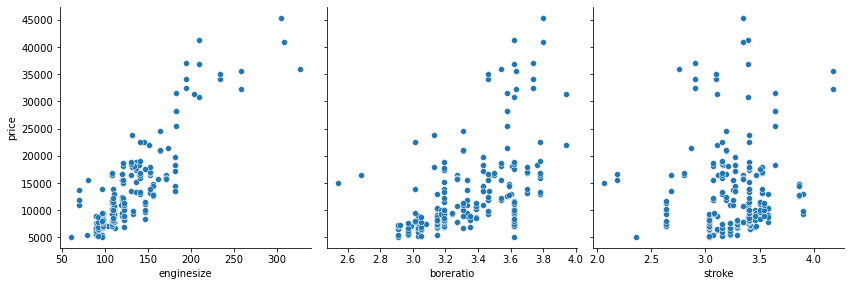

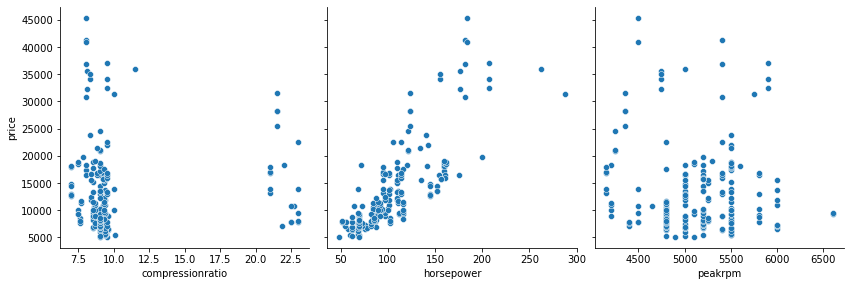

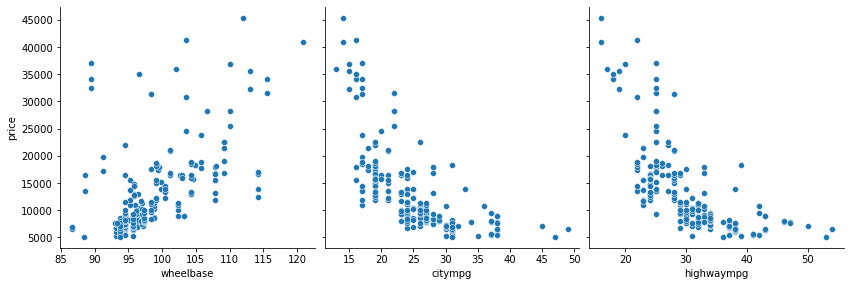

In [33]:
#Ploting Pair Plots

def a(x,y,z):
    sns.pairplot(cars_data, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

a('enginesize', 'boreratio', 'stroke')
a('compressionratio', 'horsepower', 'peakrpm')
a('wheelbase', 'citympg', 'highwaympg')

#enginesize, boreratio, horsepower, wheelbase are having positive relation with price whereas citympg, highwaympg are not hvaing relation with price.

# lets observe the correlation coefficient matrix between components  correlation

In [34]:
np.corrcoef(cars_data['carlength'], cars_data['carwidth'])[0, 1]

0.841118268481846

In [35]:
np.corrcoef(cars_data['carwidth'], cars_data['stroke'])[0, 1]

0.18294169251421802

In [36]:
np.corrcoef(cars_data['carlength'], cars_data['stroke'])[0, 1]

0.1295326111279122

In [37]:
np.corrcoef(cars_data['carheight'], cars_data['carwidth'])[0, 1]

0.2792103211097495

In [38]:
np.corrcoef(cars_data['carlength'], cars_data['carheight'])[0, 1]

0.4910294575042146

In [39]:
np.corrcoef(cars_data['carheight'], cars_data['horsepower'])[0, 1]

-0.10880205898413571

In [40]:
np.corrcoef(cars_data['horsepower'], cars_data['stroke'])[0, 1]

0.0809395357449534

In [41]:
np.corrcoef(cars_data['carlength'], cars_data['price'])[0, 1]

0.6829200156779629

In [42]:
np.corrcoef(cars_data['carheight'], cars_data['price'])[0, 1]

0.11933622657049436

In [43]:
np.corrcoef(cars_data['carwidth'], cars_data['price'])[0, 1]

0.7593252997415118

In [44]:
np.corrcoef(cars_data['horsepower'], cars_data['price'])[0, 1]

0.8081388225362212

In [45]:
np.corrcoef(cars_data['carlength'], cars_data['carwidth'])[0, 1]

0.841118268481846

In [46]:
cars_data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [47]:
np.corrcoef(cars_data['peakrpm'], cars_data['price'])[0, 1]

-0.08526715027785685

In [48]:
np.corrcoef(cars_data['compressionratio'], cars_data['price'])[0, 1]

0.06798350579944265

# so, we can observe above the co-relation between what people want to observe in cars_data

# Bivariate Analysis

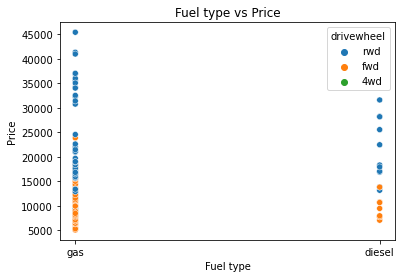

In [49]:
#plotting scatter plot between Fuel type vs Price
plt.title('Fuel type vs Price')
sns.scatterplot(x=cars_data['fueltype'],y=cars_data['price'],hue=cars_data['drivewheel'])
plt.xlabel('Fuel type')
plt.ylabel('Price')

plt.show()


        #we can observe co-relation between  fuel economy and price of car

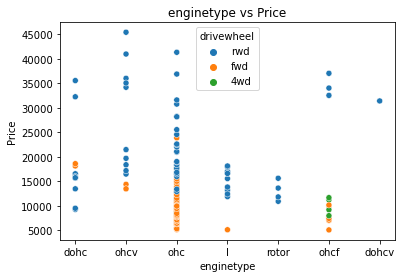

In [50]:
#plotting scatter plot between enginetype vs Price
plt.title('enginetype vs Price')
sns.scatterplot(x=cars_data['enginetype'],y=cars_data['price'],hue=cars_data['drivewheel'])
plt.xlabel('enginetype')
plt.ylabel('Price')

plt.show()


    #we can observe co-relation between  enginetype and price of car

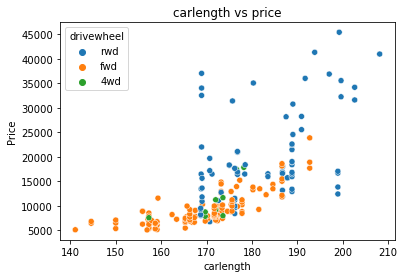

In [51]:
#plotting scatter plot between carlength vs price
plt.title('carlength vs price')
sns.scatterplot(x=cars_data['carlength'],y=cars_data['price'],hue=cars_data['drivewheel'])
plt.xlabel('carlength')
plt.ylabel('Price')

plt.show()


          #we can observe co-relation between  carlength and price of car

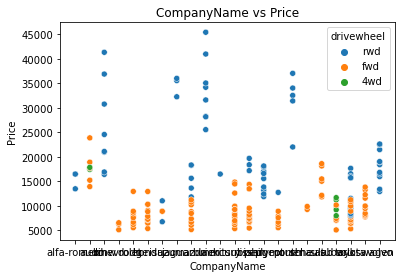

<Figure size 1440x3600 with 0 Axes>

In [52]:
#plotting scatter plot between companyname vs price
plt.title('CompanyName vs Price')
sns.scatterplot(x=cars_data['CompanyName'],y=cars_data['price'],hue=cars_data['drivewheel'])
plt.xlabel('CompanyName')
plt.ylabel('Price')
plt.figure(figsize=(20,50))
plt.show()

       #we can observe co-relation between  carname and price of car

In [53]:
#After analysing the data decided to delete some columns and finaalised some columns 
new_cars_data = cars_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueltype', 'carlength','carwidth']]


In [54]:
new_cars_data.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueltype,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,gas,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,gas,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,gas,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,gas,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,gas,176.6,66.4


In [55]:
#Now we can observe shape of the new_cars_data after finalised the data
new_cars_data.shape

(205, 15)

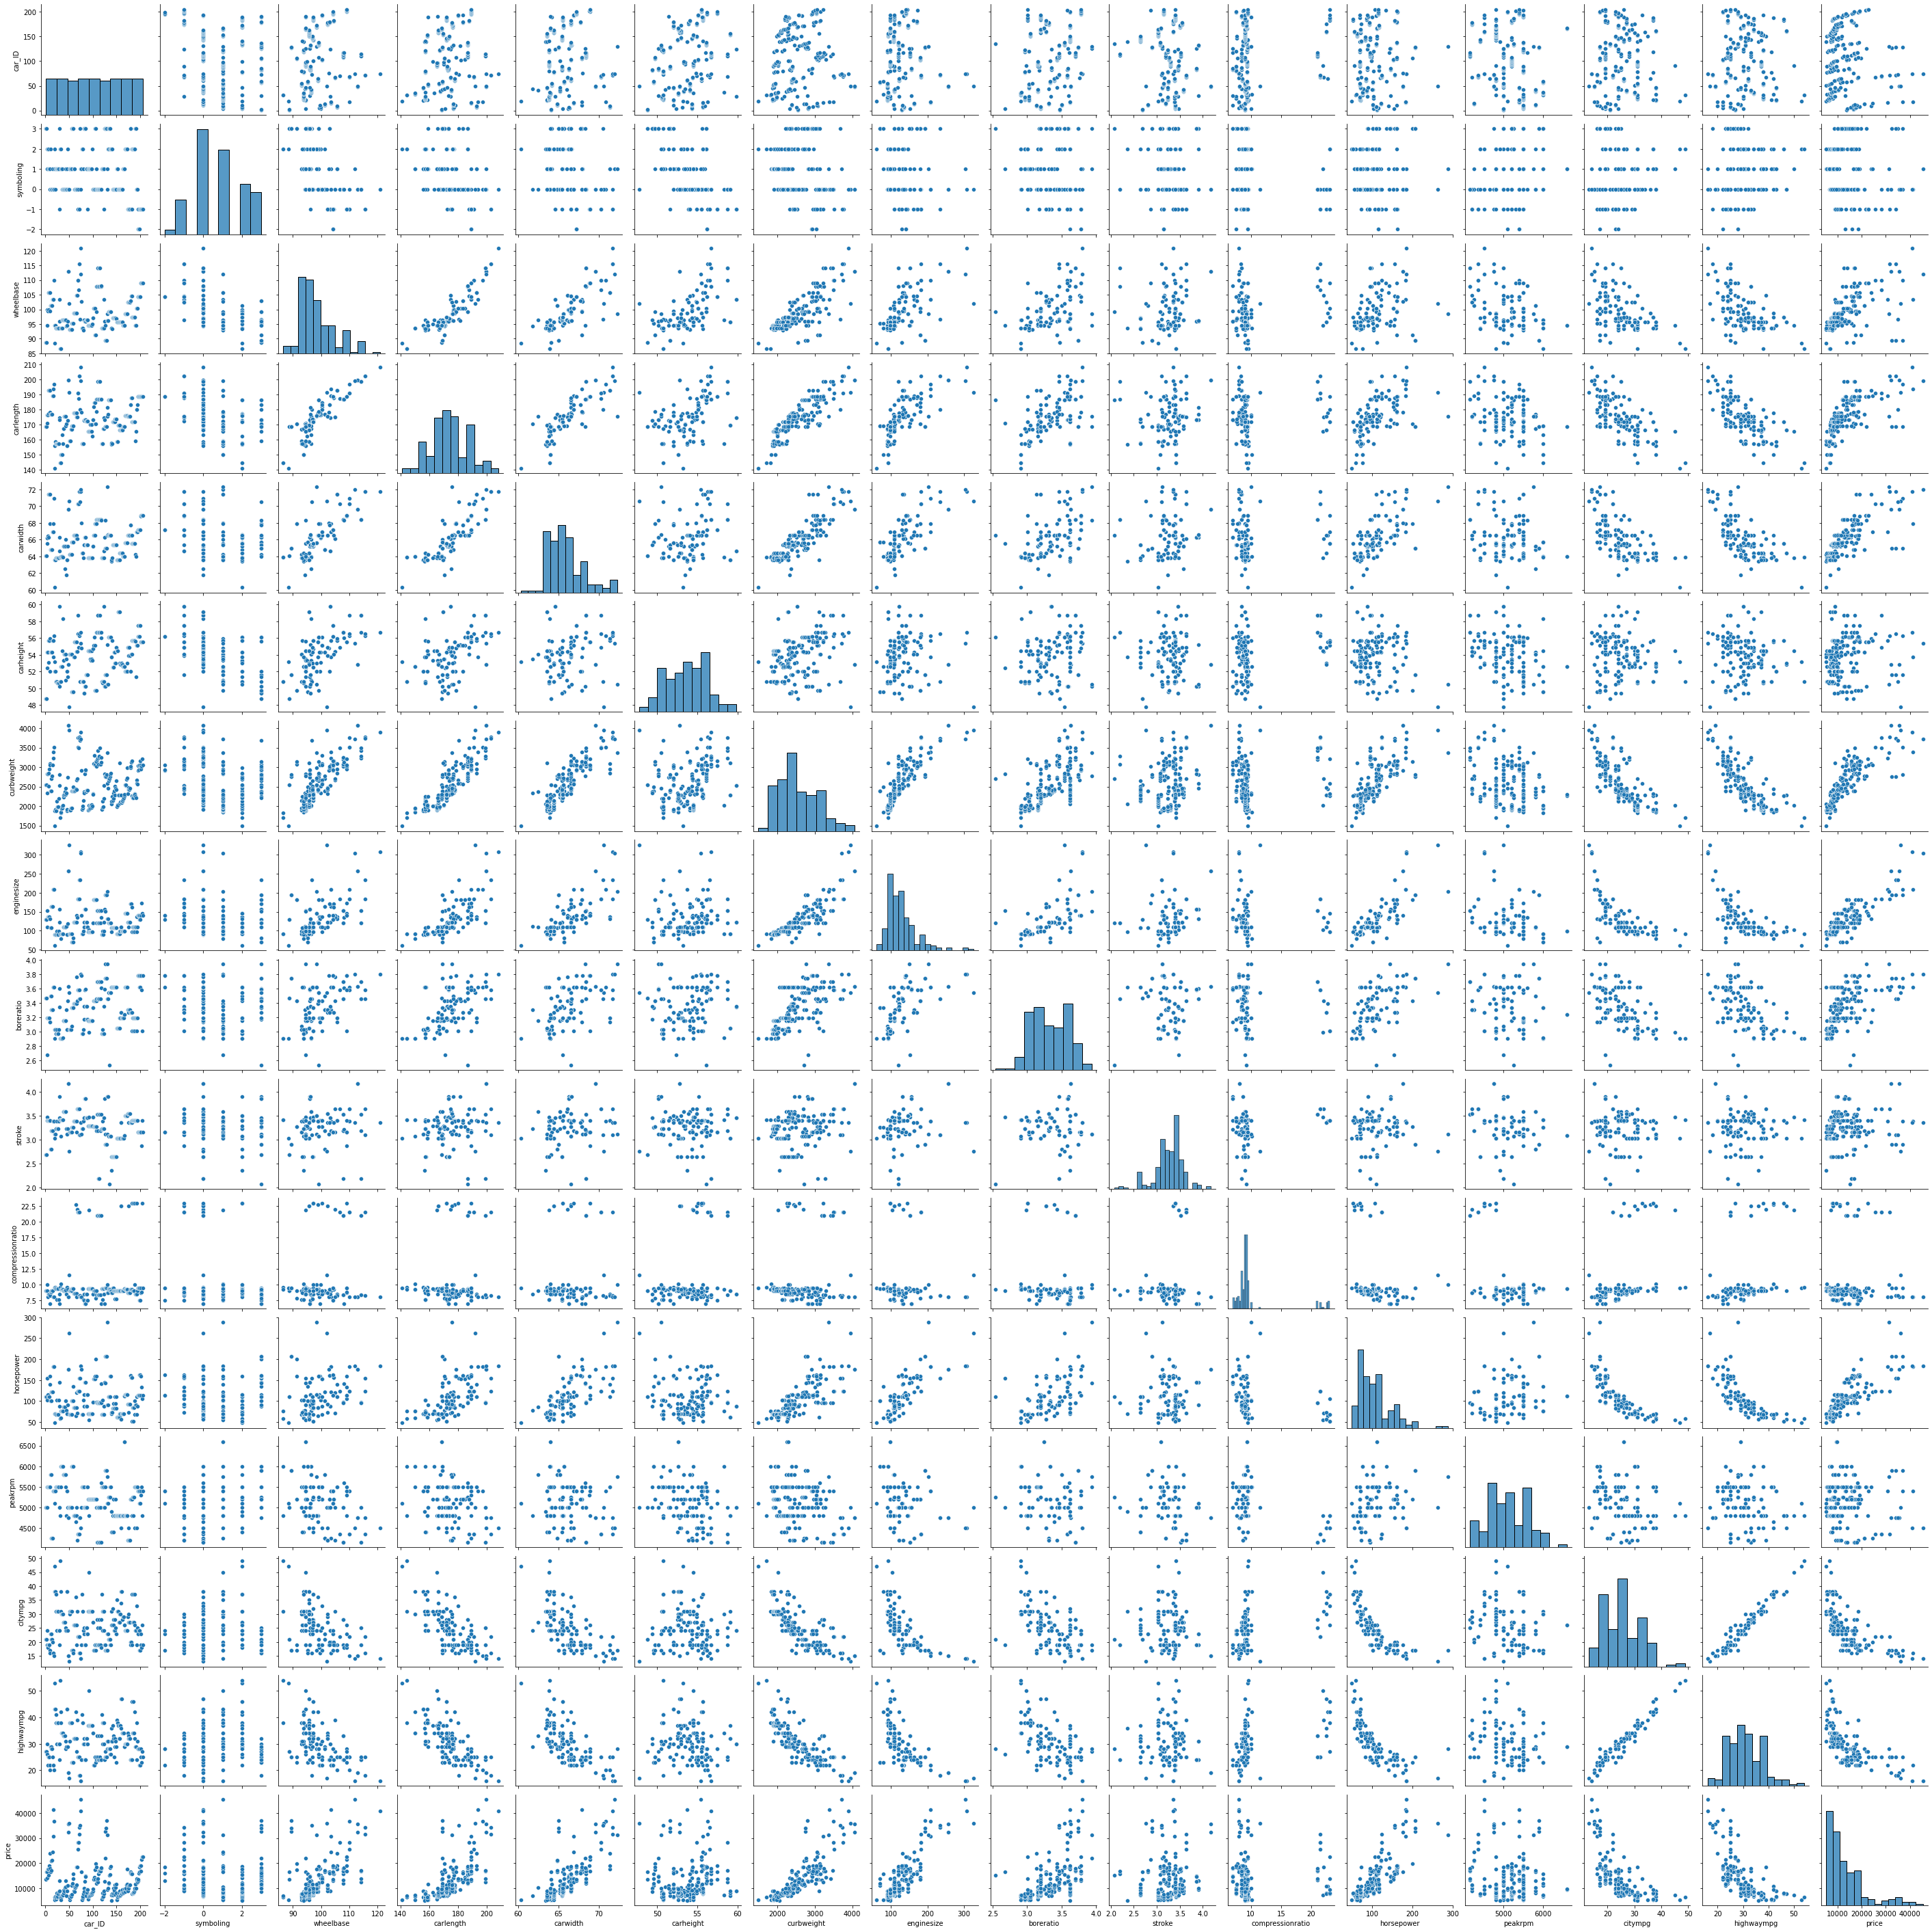

In [56]:
#Lets see pairplot of cars_data
import seaborn as sns
sns.pairplot(cars_data)

In [57]:
#lets import train_test_split from sklearn.model_selection & create new_cars_data is in df_train using train_test_split
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(new_cars_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
#print head in df_train
df_train.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueltype,carlength,carwidth
122,0.068818,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,gas,0.426016,0.291667
125,0.466890,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,gas,0.452033,0.666667
166,0.122110,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,gas,0.448780,0.308333
1,0.314446,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,gas,0.450407,0.316667
199,0.382131,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,gas,0.775610,0.575000


In [60]:
#Because of str to float error ...removing fueltype using pop option
df_train.pop('fueltype')

,fueltype,fueltype
122,gas,gas
125,gas,gas
166,gas,gas
1,gas,gas
199,gas,gas
...,...,...
87,gas,gas
103,gas,gas
67,diesel,diesel
24,gas,gas


In [61]:
#Lets describe df_train
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


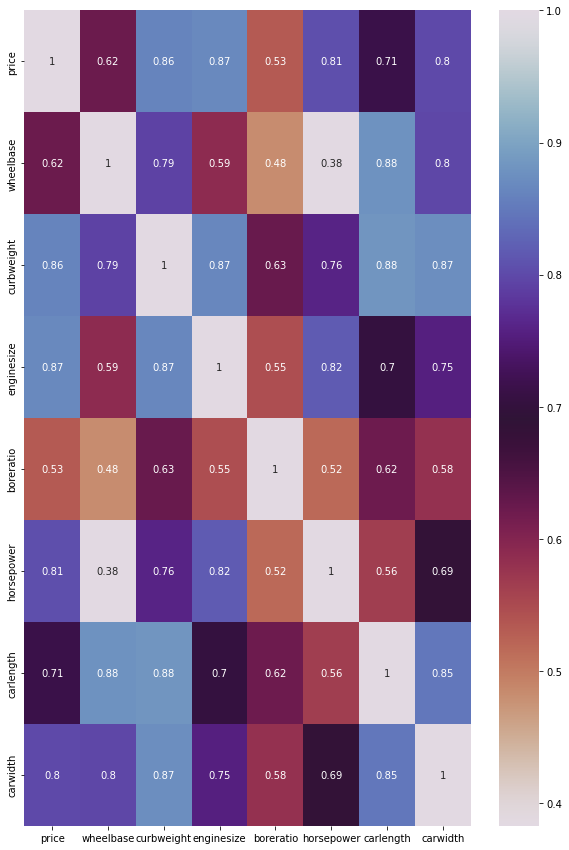

In [62]:
#Correlation using heatmap
plt.figure(figsize = (10, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="twilight_r")
plt.show()

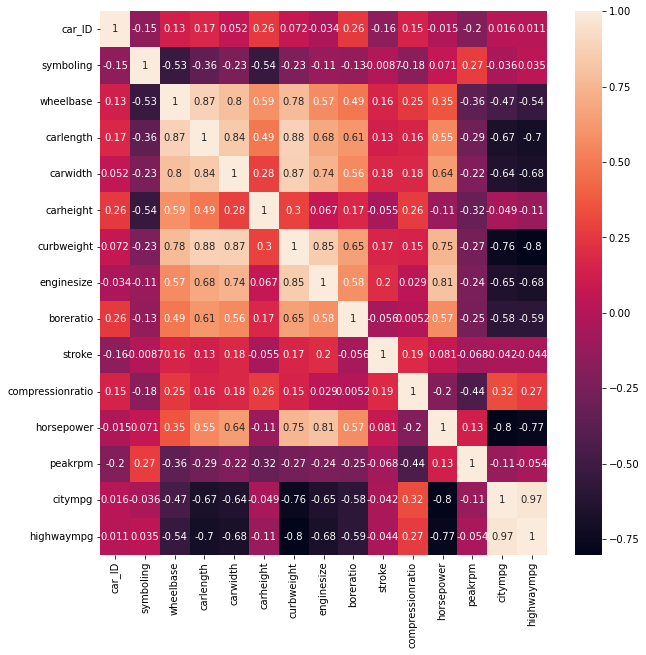

In [63]:
#Corelation using Heatmap 
plt.figure(figsize=[10,10])
sns.heatmap(cars_data.drop('price',axis=1).corr(),annot=True)
plt.show()

# ModelBuilding and Training

In [64]:
from sklearn.preprocessing import LabelEncoder

cars_data = cars_data.apply(lambda x:LabelEncoder().fit_transform(x))

In [65]:
y = cars_data.price
x = cars_data.drop('price',axis=1)

In [66]:
y = y.values.reshape((205,1))

In [67]:
m = np.zeros((x.shape[1],1))

In [68]:
lr = 0.00001
cost_list = []
for i in range(10):
    pred = np.dot(x,m)
    cost = sum((pred-y)**2)
    cost_list.append(cost)
    error = (pred-y)**2
    gradient  = 2 * np.dot(x.T,error)
    m = m - lr * gradient
    

# Import Linear regression, Lasso,Ridge Regression model from sklearn.linear_model

In [69]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

regression_model = Ridge()

regression_model.fit(x,y)

Ridge()

In [70]:
#Lets predict x
predictions = regression_model.predict(x)

In [71]:
regression_model.intercept_

array([40.77068588])

In [72]:
#lets see r2_score(predictions,y)
from sklearn.metrics import r2_score
r2_score(predictions,y)

0.9117296884272439

In [73]:
#Print columns list to observe the columns
cars_data.columns.tolist()

['car_ID',
 'symboling',
 'CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

# Import statsmodels.api and observe Ordinary Least Squares regression (OLS) 
because it is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [74]:
predictors=cars_data.drop('price',axis=1)
target=cars_data.price
predictors1=predictors['enginesize']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     411.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           9.87e-51
Time:                        17:18:34   Log-Likelihood:                -996.17
No. Observations:                 205   AIC:                             1996.
Df Residuals:                     203   BIC:                             2003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2121      4.016      5.780      0.0

In [75]:
predictors2=predictors[['enginesize','fueltype']] 
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.66e-49
Time:                        17:18:34   Log-Likelihood:                -995.75
No. Observations:                 205   AIC:                             1997.
Df Residuals:                     202   BIC:                             2007.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7614      8.198      3.631      0.0

In [76]:
#adding both models
predictors4=predictors[['enginesize','fueltype','carlength']]
import statsmodels.api as sm
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     211.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           7.44e-62
Time:                        17:18:34   Log-Likelihood:                -963.84
No. Observations:                 205   AIC:                             1936.
Df Residuals:                     201   BIC:                             1949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9506      7.480      1.063      0.2

In [77]:
predictors5=predictors[['enginesize','fueltype','stroke']] 
import statsmodels.api as sm
predictors5= sm.add_constant(predictors5)
lm_5 = sm.OLS(target,predictors5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.76e-50
Time:                        17:18:34   Log-Likelihood:                -990.61
No. Observations:                 205   AIC:                             1989.
Df Residuals:                     201   BIC:                             2003.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7785     10.149      4.905      0.0

In [78]:
predictors6=predictors[['enginesize','carwidth','carlength']]
import statsmodels.api as sm
predictors6= sm.add_constant(predictors6)
lm_6 = sm.OLS(target,predictors6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     227.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.42e-64
Time:                        17:18:34   Log-Likelihood:                -957.99
No. Observations:                 205   AIC:                             1924.
Df Residuals:                     201   BIC:                             1937.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5213      3.697      2.305      0.0

(0, 0.5, 'Car Price')

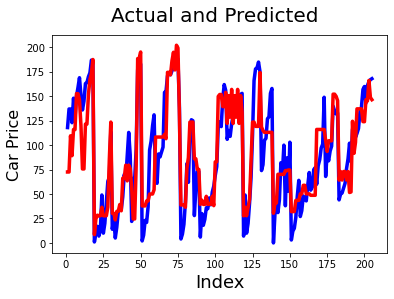

In [79]:
#lets plot Actual vs predicted plots by giving proper labeling
pred=lm_6.predict(predictors6)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-") 
#Plotting Actual 
plt.plot(c,pred, color="red", linewidth=3.5, linestyle="-") 
#Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)
# Plot heading 
plt.xlabel('Index', fontsize=18)
# X-label
plt.ylabel('Car Price', fontsize=16)
(0, 0.5, 'Car Price')

Mean_Squared_Error : 670.7493342021307
r_square_value : 0.7724622527736109


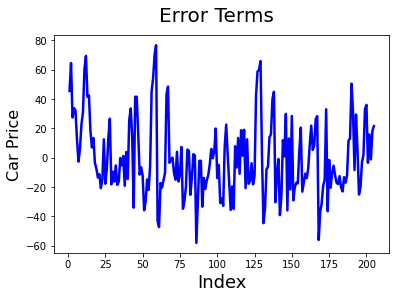

In [80]:
# lets see Error terms like mean_Square_error and r_square_value
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
# Plot heading 
plt.xlabel('Index', fontsize=18)
# X-label
plt.ylabel('Car Price', fontsize=16)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

(0, 0.5, 'Car Price')

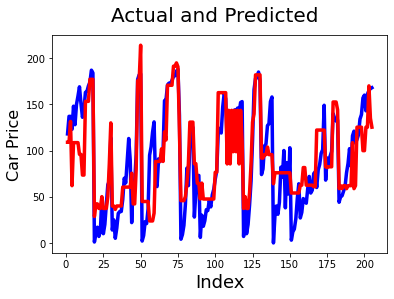

In [81]:
#ploting car_price between actual vs predicted
pred=lm_5.predict(predictors5)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-") 
#Plotting Actual 
plt.plot(c,pred, color="red", linewidth=3.5, linestyle="-") 
#Plotting predicted 
fig.suptitle('Actual and Predicted', fontsize=20)
# Plot heading 
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Car Price', fontsize=16)
(0, 0.5, 'Car Price')

Mean_Squared_Error : 922.0408783230008
r_square_value : 0.687216828095973


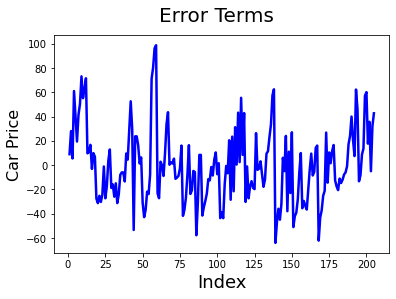

In [82]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-") 
fig.suptitle('Error Terms', fontsize=20) 
# Plot heading 
plt.xlabel('Index', fontsize=18)
# X-label 
plt.ylabel('Car Price', fontsize=16)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

(0, 0.5, 'Car Price')

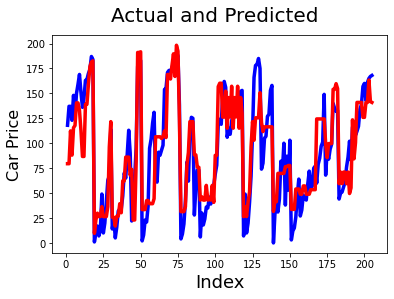

In [83]:
pred=lm_4.predict(predictors4)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")
#Plotting Actual 
plt.plot(c,pred, color="red", linewidth=3.5, linestyle="-")
#Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20) 
# Plot heading 
plt.xlabel('Index', fontsize=18) # X-label
plt.ylabel('Car Price', fontsize=16)
(0, 0.5, 'Car Price')

Mean_Squared_Error : 710.1583508115406
r_square_value : 0.7590935643493743


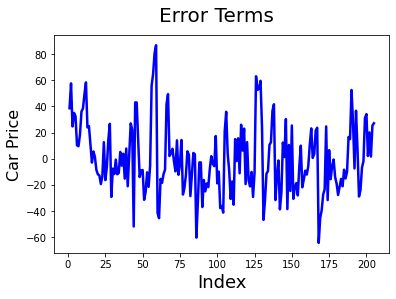

In [84]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
# Plot heading 
plt.xlabel('Index', fontsize=18)
# X-label
plt.ylabel('Car Price', fontsize=16)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

SO my point is that i have concluded from the above plots:- 
                                                                   'enginesize','Horsepower','drivewheel','carwidth','enginetype','price' plays a significant role in price prediction. So everyone are thinking mainly about these things.
As we observe above plots, In cars_price_prediction , 'enginesize','drivewheel','carwidth','enginetype','price','Horsepower' plays a significant role.
                                                                           
                                                                                                       Thank you sir
                                                                                                       Dubbaka Srikanth
                                                                                                       G-17 Python & ML